# Wrangling of WeRateDogs Twitter data

## Introduction

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

## Table of Contents
- [Data gathring](#gathering)
- [Data assessment](#assessment)
- [Data cleaning](#cleaning)
- [Data storing](#storing)
- [Data analysis and visualisation](#analysis)

## 1. Data gathering

In [103]:
#import libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from matplotlib import pyplot

### 1.1 Twitter archieve data

In [104]:
#read csv file and store in "tweet_data". Take a look on first 5 rows.
tweet_data=pd.read_csv('twitter-archive-enhanced.csv')
tweet_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### 1.2 Image predictions data

In [105]:
# Use requests library to download tsv file from a website
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open((url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [106]:
# Read in tsv file as a Pandas DataFrame and store in "predictions".
predictions=pd.read_csv('image-predictions.tsv',sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [107]:
#find number of rows, data types and missing values
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 1.3 Twitter API data

Personal API keys, secrets, and tokens have been replaced with placeholders

In [108]:
# consumer_key = 'XXXX' 
# consumer_secret = 'XXXX'
# access_token = 'XXXX'
# access_secret = 'XXXX'

In [109]:
# Variables created for tweepy query
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [110]:
# Write the querying JSON data into tweet_json.txt
# with open('tweet_json.txt','a',encoding = 'utf8') as f:
#     for tweet_id in tweet_data['tweet_id']:
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode = 'extended') # set mode to extended
#             json.dump(tweet._json, f)
#             f.write('\n')
#         except: 
#             print('tweet_id = %s didn\'t work' % (tweet_id))

In [111]:
# Converting JSON data to dataframe
tweets_list =[]
with open('tweet_json.txt') as file:
    for line in file:    
        tweets_dict = {}
        tweets_json = json.loads(line)        
        try:
            tweets_dict['tweet_id'] = tweets_json['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)

In [112]:
tweets_api = pd.DataFrame(tweets_list)

In [113]:
#find number of rows, data types and missing values
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
favorite_count    2332 non-null int64
retweet_count     2332 non-null int64
tweet_id          2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


## 2. Data assessment 

### 2.1 Twitter archieve data

In [114]:
# Display the tweet_data table
tweet_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [115]:
#this displays a summary of the dataframe including the number of non-null values in each column
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [116]:
#this returns a tuple of the dimensions of the dataframe
tweet_data.shape

(2356, 17)

In [117]:
#this returns the datatypes of the columns
tweet_data.dtypes

tweet_id                      int64  
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                     object 
source                        object 
text                          object 
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp    object 
expanded_urls                 object 
rating_numerator              int64  
rating_denominator            int64  
name                          object 
doggo                         object 
floofer                       object 
pupper                        object 
puppo                         object 
dtype: object

In [118]:
#this returns the number of unique values in each column
tweet_data.nunique()

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64

In [119]:
#this returns descriptive statistics for each column of data
tweet_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [120]:
#count of duplicates in the dataset
sum(tweet_data.duplicated())

0

In [121]:
#this returns counts of unique values of rating denominator column
tweet_data.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [122]:
#assess columns where rating numerator is more than 20
pd.set_option('display.max_colwidth',-1)
tweet_data[tweet_data.rating_denominator!=10][['text','rating_denominator','tweet_id']]

,text,rating_denominator,tweet_id
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0,835246439529840640
342,@docmisterio account started on 11/15/15,15,832088576586297345
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70,820690176645140481
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7,810984652412424192
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11,775096608509886464
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150,758467244762497024
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11,740373189193256964
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170,731156023742988288
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20,722974582966214656
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,716439118184652801


In [123]:
# number of tweets which has rating denominator not equal to 10
tweet_data.query('rating_denominator != 10').rating_denominator.count()

23

In [124]:
#this returns counts of unique values of rating numerator
tweet_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [125]:
#assess columns where rating numerator is more than 20
pd.set_option('display.max_colwidth',-1)
tweet_data[tweet_data.rating_numerator>20][['text','rating_numerator','tweet_id']]

,text,rating_numerator,tweet_id
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,855862651834028034
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,855860136149123072
290,@markhoppus 182/10,182,838150277551247360
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,835246439529840640
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,832215909146226688
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,820690176645140481
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,810984652412424192
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,786709082849828864
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,778027034220126208
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,758467244762497024


In [126]:
#number of null values of exanded urls
tweet_data.expanded_urls.isnull().sum()

59

In [127]:
#this returns counts of unique values of source column
tweet_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

During data assessment of tweet_data the following quality and tidiness issues have been found:
<br>

Data quality issues:
* Some tweets are retweets. Columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' should be dropped because we need only original data for this project.
* Some tweets are in-replies. Columns 'in_reply_to_status_id', 'in_reply_to_user_id' should be dropped because we need only original data for this project.
* Data correctness: for some tweets rating denominator is not extracted properly from the 'text' column:

  rating denominator == 7 should be dropped, because this tweet does not contain rating ('810984652412424192')

  rating denominator for tweet_ids should be changed to 10:
    
      '835246439529840640'
      '740373189193256964'
      '722974582966214656'
      '716439118184652801'
      '682962037429899265'
      '666287406224695296' 



* Data correctness: for rating numerator >20 some rating numerators were not extracted properly from the 'text' column: 

        for tweet id '835246439529840640' to 13, 
        for tweet id '832215909146226688' to 9.75, 
        for tweet id '778027034220126208' to 11.27, 
        for tweet id '716439118184652801' to 11, 
        for tweet id '680494726643068929' to 11.26

    In addition to this, I will drop an outlier with rating_numerator == 1776.0 at tweet_id == '749981277374128128'
    
* Columns shoud be renamed: 'timestamp': 'tweet_timestamp', 'text': 'tweet_text','name': 'dog_name', 'source': 'tweet_source'
* Timestamp should be datetime format
* For source column url should be extracted from html tags.
    
Tideness issues:
* For dog stage we have 4 columns: Doggo, floofer, puppo, pupper. We can create only one column 'dog_stage', where doggo, puppo, pupper are the values.
* Column 'rating numerator' and 'rating denominator' can be merge in one column called 'rating'. Column 'rating_denominator' will be removed because all values are 10. 



### 2.2 Image predictions data

In [128]:
#display image predictions data
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [129]:
#this displays a summary of the dataframe including the number of non-null values in each column
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [130]:
#this returns a tuple of the dimensions of the dataframe
predictions.shape

(2075, 12)

In [131]:
#this returns the datatypes of the columns
predictions.dtypes

tweet_id    int64  
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

In [132]:
#this returns descriptive statistics for each column of data
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [133]:
#this returns counts of unique values of p1 column
predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
German_shepherd              20 
Siberian_husky               20 
Staffordshire_bullterrier    20 
web_site                     19 
Cardigan                     19 
Shetland_sheepdog            18 
Maltese_dog                  18 
Eskimo_dog                   18 
beagle                       18 
teddy                        18 
Shih-Tzu                     17 
Rottweiler                   17 
Lakeland_terrier             17 
Italian_greyhound            16 
kuvasz                       16 
          

In [134]:
#find out how many dogs were predicted with first prediction
predictions.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [135]:
#this returns counts of unique values of p2 column
predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
French_bulldog                    41 
Chesapeake_Bay_retriever          41 
toy_poodle                        37 
cocker_spaniel                    34 
miniature_poodle                  33 
Siberian_husky                    33 
beagle                            28 
Eskimo_dog                        27 
collie                            27 
Pembroke                          27 
kuvasz                            26 
Italian_greyhound                 22 
Pekinese                          21 
American_Staffordshire_terrier    21 
malinois                          20 
toy_terrier                       20 
Samoyed                           20 
chow                              20 
miniature_pinscher                20 
Norwegian_elkhound                19 
Boston_bull                       19 
Staffordshir

In [136]:
#find out how many dogs were predicted with second prediction
predictions.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [137]:
#this returns counts of unique values of p3 column
predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [138]:
#find out how many dogs were predicted with third prediction
predictions.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

During assessment of image predictions data the following quality issues have been found:
<br>

Data quality issues:
* columns should be renamed: p1 - prediction1, p1_conf- prediction1_CI, p1_dog - prediction1_dog, p2 - prediction2, p2_conf- prediction2_CI, p2_dog - prediction2_dog, p3 - prediction3, p3_conf- prediction3_CI, p3_dog - prediction3_dog. 
* only values where p1_dog is True will be kept


### 2.3 Twitter API data

In [139]:
#display tweets_api table
tweets_api

,favorite_count,retweet_count,tweet_id
0,37419,8129,892420643555336193
1,32149,6024,892177421306343426
2,24247,3987,891815181378084864
3,40723,8292,891689557279858688
4,38954,8983,891327558926688256
5,19565,2984,891087950875897856
6,11432,1977,890971913173991426
7,63090,18087,890729181411237888
8,26920,4093,890609185150312448
9,30861,7071,890240255349198849


In [140]:
#this displays a summary of the dataframe including the number of non-null values in each column
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
favorite_count    2332 non-null int64
retweet_count     2332 non-null int64
tweet_id          2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [141]:
#number of duplicated tweets 
tweets_api.tweet_id.duplicated().sum()

0

In [142]:
#this returns a tuple of the dimensions of the dataframe
tweets_api.shape

(2332, 3)

In [143]:
#this returns descriptive statistics for each column of data
tweets_api.describe()

,favorite_count,retweet_count,tweet_id
count,2332.000000,2332.000000,2.332000e+03
mean,7801.642796,2853.753859,7.419645e+17
std,12106.726614,4831.528649,6.821088e+16
min,0.000000,1.000000,6.660209e+17
25%,1351.750000,573.750000,6.783205e+17
50%,3396.500000,1334.000000,7.184574e+17
75%,9570.000000,3331.250000,7.986673e+17
max,161597.000000,82006.000000,8.924206e+17


#### Tidiness issues

Merging all the datasets into 1 table  as 1 observational unit (tweets info) should be in 1 table only as rule 3 
(Each type of observational unit forms a table.).

## 3. Data cleaning

### 3.1 Twitter archieve data

In [144]:
#create a copy of the original data before cleaning
tweet_data_clean=tweet_data.copy()

In [145]:
#display first 5 rows
tweet_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


***Define***

Convert timestamp to datetime format.

***Code***

In [146]:
tweet_data_clean.timestamp=pd.to_datetime(tweet_data_clean.timestamp)

***Test***

In [147]:
tweet_data_clean.timestamp.dtype

datetime64[ns, UTC]

***Define***

Remove retweets

***Code***

In [148]:
tweet_data_clean=tweet_data_clean[tweet_data_clean.retweeted_status_id.isnull()]

***Test***

In [149]:
#Confirm that retweet_status_id column contains only 0 values (no retweets)
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns, UT

***Define***

Drop retweet columns since they have only 0 values

***Code***

In [150]:
tweet_data_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

***Test***

In [151]:
# Confirm retweet columns are gone
list(tweet_data_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

***Define***

Remove in reply to status tweets 

***Code***

In [152]:
tweet_data_clean=tweet_data_clean[tweet_data_clean.in_reply_to_status_id.isnull()]

***Test***

In [153]:
#Confirm that in_reply_to_status_id contains only 0 values (no in replies)
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null datetime64[ns, UTC]
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(8)
memory usage: 245.7+ KB


***Define***

Drop in reply to status columns

***Code***

In [154]:
tweet_data_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

***Test***

In [155]:
# Confirm in reply to status id columns are gone
list(tweet_data_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

***Define***

For rating numerator >20 extract change the rating numerator to the correct value: 

for tweet id '835246439529840640' to 13, 

for tweet id '832215909146226688' to 9.75, 

for tweet id '778027034220126208' to 11.27, 

for tweet id '716439118184652801' to 11, 

for tweet id '680494726643068929' to 11.26

---

In addition to this, I will drop an outlier with rating_numerator == 1776.0 at tweet_id == '749981277374128128'

***Code***

In [156]:
def correct_values(data_frame, column_name, to_correct):
    corrected_keys = to_correct.keys()

    for k, v in to_correct.items():
        data_frame.loc[data_frame.tweet_id == k, column_name] = v

    return data_frame.query('tweet_id == '+str(list(corrected_keys)))

In [157]:
# Drop rating_numerator == 1776
tweet_data_clean.query('tweet_id != 749981277374128128', inplace=True)

# Correct other numerators
corrected_numerators = {
    835246439529840640: 13,
    832215909146226688: 9.75,
    778027034220126208: 11.27,
    716439118184652801: 11,
    680494726643068929: 11.26
}
    
correct_values(tweet_data_clean, 'rating_numerator', corrected_numerators)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,None,None,pupper,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11.00,50,Bluebert,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,None,None,None,None,None


***Test***

In [158]:
#confirm that rating_numerator values<20
tweet_data_clean.rating_numerator.value_counts()

12.00     486
10.00     436
11.00     414
13.00     287
9.00      153
8.00      98 
7.00      52 
14.00     38 
5.00      34 
6.00      32 
3.00      19 
4.00      16 
2.00      9  
1.00      5  
24.00     1  
84.00     1  
0.00      1  
420.00    1  
75.00     1  
60.00     1  
44.00     1  
144.00    1  
88.00     1  
11.26     1  
11.27     1  
121.00    1  
204.00    1  
99.00     1  
45.00     1  
165.00    1  
80.00     1  
Name: rating_numerator, dtype: int64

***Define***

Correct denominators which are not equal to 10.

* Data correctness: for some tweets rating denominator is not extracted properly:

    rating denominator == 7 should be dropped, because this tweet does not contain rating ('810984652412424192')

    rating denominator for tweet_ids should be changed to 10:
    
        '835246439529840640'
        '740373189193256964'
        '722974582966214656'
        '716439118184652801'
        '682962037429899265'
        '666287406224695296' 


***Code***

In [159]:
# Drop rating_denomintor == 7
tweet_data_clean.query('tweet_id != 810984652412424192', inplace=True)

# Correct other denominators
corrected_denominators = {
    835246439529840640: 10,
    740373189193256964: 10,
    722974582966214656: 10,
    716439118184652801: 10,
    682962037429899265: 10,
    666287406224695296: 10
}
correct_values(tweet_data_clean, 'rating_denominator', corrected_denominators)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,10,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,10,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11.0,10,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7.0,10,Darrel,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,10,an,None,None,None,None


***Test***

In [160]:
#confirm that rating_denominator column has only values equal to 10
tweet_data_clean.rating_denominator.value_counts()

10     2084
80     2   
50     2   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
Name: rating_denominator, dtype: int64

***Define***

Devide rating_numerator column by 10 and rename the column to 'dog_rating' (which is equal to rating_numerator/rating_denominator')

***Code***

In [161]:
tweet_data_clean.rating_numerator=tweet_data_clean.rating_numerator/10

In [162]:
tweet_data_clean.rename(columns={'rating_numerator':'dog_rating'}, inplace=True)

***Test***

In [163]:
#confirm that we have a dog_rating column
list(tweet_data_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'dog_rating',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [164]:
#check that dog_rating values are devided by 10
tweet_data_clean.dog_rating.describe()

count    2095.000000
mean     1.130861   
std      1.197842   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      42.000000  
Name: dog_rating, dtype: float64

***Define***

Drop rating_denominator column because all values are 10

***Code***

In [165]:
tweet_data_clean.drop('rating_denominator', axis=1, inplace=True)

***Test***

In [166]:
#confirm that rating_denominator column is gone
list(tweet_data_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'dog_rating',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

***Define***

For source column extract url from html tags.

***Code***

In [167]:
try:
    l = [BeautifulSoup(source).a.get('href') for source in tweet_data_clean.source]
    tweet_data_clean.source = l
except:
    print('source is up-to-date')

***Test***

In [168]:
#confirm that source url is extracted
tweet_data_clean.source.head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

***Define***

Create column dog stage which is the combination of 4 columns

In [169]:
#change None values to zeroes
tweet_data_clean.replace('None','',inplace=True)

In [170]:
tweet_data_clean['dog_stage']=tweet_data_clean.doggo.str.cat([tweet_data_clean.floofer,tweet_data_clean.pupper,tweet_data_clean.puppo], sep=' ')
tweet_data_clean.dog_stage = tweet_data_clean.dog_stage.replace(regex={r'\s+$': ''}).replace(regex={r'\s+': ' '}).replace(regex={r'^\s+': ''})

In [171]:
(tweet_data_clean.dog_stage=='pupper').sum()

221

***Test***

In [172]:
#Check values of dog_stage column
tweet_data_clean.dog_stage.value_counts()

                 1759
pupper           221 
doggo            72  
puppo            23  
floofer          9   
doggo pupper     9   
doggo floofer    1   
doggo puppo      1   
Name: dog_stage, dtype: int64

***Defne***

Drop columns pupper, doggo, puppo and floofer

***Code***

In [173]:
tweet_data_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

***Test***

In [174]:
#confirm that columns 'doggo','floofer','pupper','puppo' are gone
list(tweet_data_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'dog_rating',
 'name',
 'dog_stage']

***Define***

Rename columns

***Code***

In [175]:
tweet_data_clean.rename(columns={'timestamp': 'tweet_timestamp', 'text': 'tweet_text', 'name': 'dog_name', 'source': 'tweet_source'}, inplace=True)

***Test***

In [176]:
#confirm new column names
list(tweet_data_clean)

['tweet_id',
 'tweet_timestamp',
 'tweet_source',
 'tweet_text',
 'expanded_urls',
 'dog_rating',
 'dog_name',
 'dog_stage']

### 3.2 Image predictions data

In [177]:
#create copy of data before cleaning
predictions_clean=predictions.copy()

***Define***

Rename columns

***Code***

In [178]:
predictions_clean.rename(columns={'p1': 'prediction1', 'p1_conf': 'prediction1_CI','p2': 'prediction2','p2_conf': 'prediction2_CI', 'p3': 'prediction3','p3_conf':'prediction3_CI','p1_dog':'prediction1_dog','p2_dog':'prediction2_dog','p3_dog':'prediction3_dog'}, inplace=True)

***Test***

In [179]:
#confirm new column names
list(predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction1',
 'prediction1_CI',
 'prediction1_dog',
 'prediction2',
 'prediction2_CI',
 'prediction2_dog',
 'prediction3',
 'prediction3_CI',
 'prediction3_dog']

***Define***

Keep only values, where first prediction is dog (p1_dog=True) 

***Code***

In [180]:
predictions_clean.query('prediction1_dog == True', inplace=True)

***Test***

In [181]:
#check that prediction1_dog is True
predictions_clean.prediction1_dog.value_counts()

True    1532
Name: prediction1_dog, dtype: int64

***Define***

Drop jpg_url, img_num columns before merging with other tables

***Code***

In [182]:
predictions_clean.drop(['jpg_url','img_num'], axis=1, inplace=True)

***Test***

In [183]:
#check tha columns jpg_url, img_num are gone
list(predictions_clean)

['tweet_id',
 'prediction1',
 'prediction1_CI',
 'prediction1_dog',
 'prediction2',
 'prediction2_CI',
 'prediction2_dog',
 'prediction3',
 'prediction3_CI',
 'prediction3_dog']

### 3.3 Twitter API data

In [184]:
# create a copy of the dataset before cleaning
tweets_api_clean=tweets_api.copy()

***Define***

Merge tweets_api_clean with tweet_data_clean on tweet_id and store the result in a new table twitter_archive_master

***Code***

In [185]:
twitter_archive_master=tweet_data_clean.merge(tweets_api_clean, on='tweet_id')

***Test***

In [186]:
#check that merging went fine
twitter_archive_master.sample(25)

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,dog_rating,dog_name,dog_stage,favorite_count,retweet_count
396,811744202451197953,2016-12-22 01:24:33+00:00,http://twitter.com/download/iphone,This is Halo. She likes watermelon. 13/10 https://t.co/TZkiQZqwA6,https://twitter.com/dog_rates/status/811744202451197953/photo/1,1.3,Halo,,7938,1713
1165,699788877217865730,2016-02-17 02:54:04+00:00,http://twitter.com/download/iphone,Say hello to Nala. She's a Freckled High Bruschetta. Petable af. 12/10 https://t.co/5bjrIRqByp,https://twitter.com/dog_rates/status/699788877217865730/photo/1,1.2,Nala,,2303,521
1986,667801013445750784,2015-11-20 20:25:43+00:00,http://twitter.com/download/iphone,OMIGOD 12/10 https://t.co/SVMF4Frf1w,https://twitter.com/dog_rates/status/667801013445750784/photo/1,1.2,,,327,97
58,879862464715927552,2017-06-28 00:42:13+00:00,http://twitter.com/download/iphone,This is Romeo. He would like to do an entrance. Requesting your immediate assistance. 13/10 https://t.co/Qh5aEkRQm9,"https://twitter.com/dog_rates/status/879862464715927552/photo/1,https://twitter.com/dog_rates/status/879862464715927552/photo/1,https://twitter.com/dog_rates/status/879862464715927552/photo/1",1.3,Romeo,,21616,3353
1417,683030066213818368,2016-01-01 21:00:32+00:00,http://twitter.com/download/iphone,This is Lulu. She's contemplating all her unreached 2015 goals and daydreaming of a more efficient tomorrow. 10/10 https://t.co/h3ScYuz77J,https://twitter.com/dog_rates/status/683030066213818368/photo/1,1.0,Lulu,,2217,763
193,846153765933735936,2017-03-27 00:15:53+00:00,http://twitter.com/download/iphone,This is Vixen. He really likes bananas. Steals them when he thinks nobody's watching. 13/10 opportunistic af https://t.co/a0CkS5ExFR,"https://twitter.com/dog_rates/status/846153765933735936/photo/1,https://twitter.com/dog_rates/status/846153765933735936/photo/1",1.3,Vixen,,32358,9395
718,754482103782404096,2016-07-17 01:05:25+00:00,http://twitter.com/download/iphone,This is Milo. He's currently plotting his revenge. 10/10 https://t.co/ca0q9HM8II,https://twitter.com/dog_rates/status/754482103782404096/video/1,1.0,Milo,,5513,2062
1592,675853064436391936,2015-12-13 01:41:41+00:00,http://twitter.com/download/iphone,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",8.8,,,2720,1335
337,820078625395449857,2017-01-14 01:22:35+00:00,http://twitter.com/download/iphone,I've never wanted to go to a camp more in my entire life. 12/10 for all on board https://t.co/wJZlpGFEbD,"https://twitter.com/dog_rates/status/820078625395449857/photo/1,https://twitter.com/dog_rates/status/820078625395449857/photo/1,https://twitter.com/dog_rates/status/820078625395449857/photo/1",1.2,,,20713,6706
338,819952236453363712,2017-01-13 17:00:21+00:00,http://twitter.com/download/iphone,This is Oliver. He has dreams of being a service puppo so he can help his owner. 13/10 selfless af\n\nmake it happen:\nhttps://t.co/f5WMsx0a9K https://t.co/6lJz0DKZIb,"https://www.gofundme.com/servicedogoliver,https://twitter.com/dog_rates/status/819952236453363712/photo/1",1.3,Oliver,puppo,5569,1267


***Define***

Merge twitter_archive_master with predictions_clean on tweet_id 

***Code***

In [187]:
twitter_archive_master=twitter_archive_master.merge(predictions_clean, on='tweet_id')

***Test***

In [188]:
#check that merging went fine
twitter_archive_master.sample(25)

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,dog_rating,dog_name,dog_stage,favorite_count,retweet_count,prediction1,prediction1_CI,prediction1_dog,prediction2,prediction2_CI,prediction2_dog,prediction3,prediction3_CI,prediction3_dog
1433,666396247373291520,2015-11-16 23:23:41+00:00,http://twitter.com/download/iphone,Oh goodness. A super rare northeast Qdoba kangaroo mix. Massive feet. No pouch (disappointing). Seems alert. 9/10 https://t.co/Dc7b0E8qFE,https://twitter.com/dog_rates/status/666396247373291520/photo/1,0.9,,,161,81,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,4.576810e-03,True
207,831309418084069378,2017-02-14 01:09:44+00:00,http://twitter.com/download/iphone,This is Scooter and his son Montoya. Scooter is a wonderful father. He takes very good care of Montoya. Both 12/10 would pet at same time https://t.co/ghqMfxxa4V,https://twitter.com/dog_rates/status/831309418084069378/photo/1,1.2,Scooter,,12176,2588,Doberman,0.369389,True,kelpie,0.132449,True,Labrador_retriever,7.472730e-02,True
958,688116655151435777,2016-01-15 21:52:49+00:00,http://twitter.com/download/iphone,Please send dogs. I'm tired of seeing other stuff like this dangerous pirate. We only rate dogs. Thank you... 10/10 https://t.co/YdLytdZOqv,https://twitter.com/dog_rates/status/688116655151435777/photo/1,1.0,,,2918,811,pug,0.973819,True,Chihuahua,0.010891,True,Staffordshire_bullterrier,6.863890e-03,True
952,688828561667567616,2016-01-17 21:01:41+00:00,http://twitter.com/download/iphone,Say hello to Brad. His car probably has a spoiler. Tan year round. Likes your insta pic but doesn't text back. 9/10 https://t.co/dfCCK3tWfr,https://twitter.com/dog_rates/status/688828561667567616/photo/1,0.9,Brad,,1417,390,Cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,3.115820e-02,False
1367,668221241640230912,2015-11-22 00:15:33+00:00,http://twitter.com/download/iphone,These two dogs are Bo &amp; Smittens. Smittens is trying out a new deodorant and wanted Bo to smell it. 10/10 true pals https://t.co/4pw1QQ6udh,https://twitter.com/dog_rates/status/668221241640230912/photo/1,1.0,,,509,197,chow,0.395101,True,golden_retriever,0.372115,True,Labrador_retriever,1.487850e-01,True
1350,668636665813057536,2015-11-23 03:46:18+00:00,http://twitter.com/download/iphone,This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg,https://twitter.com/dog_rates/status/668636665813057536/photo/1,1.0,an,,1032,492,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False
1004,684177701129875456,2016-01-05 01:00:50+00:00,http://twitter.com/download/iphone,This is Kulet. She's very proud of the flower she picked. Loves it dearly. 10/10 now I want a flower https://t.co/myUUwqJIs7,https://twitter.com/dog_rates/status/684177701129875456/photo/1,1.0,Kulet,,2077,703,chow,0.334783,True,German_shepherd,0.162647,True,golden_retriever,1.386120e-01,True
1379,667793409583771648,2015-11-20 19:55:30+00:00,http://twitter.com/download/iphone,Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10 https://t.co/s1z7mX4c9O,https://twitter.com/dog_rates/status/667793409583771648/photo/1,0.8,,,693,331,dalmatian,0.535073,True,English_setter,0.451219,True,Great_Dane,8.163610e-03,True
766,709225125749587968,2016-03-14 03:50:21+00:00,http://twitter.com/download/iphone,This is Walker. He's a Butternut Khalifa. Appears fuzzy af. 11/10 would hug for a ridiculous amount of time https://t.co/k6fEWHSALn,https://twitter.com/dog_rates/status/709225125749587968/photo/1,1.1,Walker,,2466,594,Labrador_retriever,0.271109,True,Pomeranian,0.150487,True,golden_retriever,1.455780e-01,True
1426,666447344410484738,2015-11-17 02:46:43+00:00,http://twitter.com/download/iphone,This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say https://t.co/kH60oka1HW,https://twitter.com/dog_rates/status/666447344410484738/photo/1,0.9,Scout,

## 4. Data storing

Store twitter_archive_master table in twitter_archive_master.csv file

In [189]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False, encoding='utf-8')

In [190]:
#read the file and display first 5 rows to check that the save file looks ok
df=pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,dog_rating,dog_name,dog_stage,favorite_count,retweet_count,prediction1,prediction1_CI,prediction1_dog,prediction2,prediction2_CI,prediction2_dog,prediction3,prediction3_CI,prediction3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,1.3,Tilly,NaN,32149,6024,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,1.2,Archie,NaN,24247,3987,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",1.2,Franklin,NaN,38954,8983,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,891087950875897856,2017-07-29 00:08:17+00:00,http://twitter.com/download/iphone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,1.3,NaN,NaN,19565,2984,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
4,890971913173991426,2017-07-28 16:27:12+00:00,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",1.3,Jax,NaN,11432,1977,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False


In [191]:
df_2=df[df.dog_stage=='doggo']
df_2.head()

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,dog_rating,dog_name,dog_stage,favorite_count,retweet_count,prediction1,prediction1_CI,prediction1_dog,prediction2,prediction2_CI,prediction2_dog,prediction3,prediction3_CI,prediction3_dog
7,890240255349198849,2017-07-26 15:59:51+00:00,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,1.4,Cassie,doggo,30861,7071,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
33,884162670584377345,2017-07-09 21:29:42+00:00,http://twitter.com/download/iphone,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,1.2,Yogi,doggo,19695,2862,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
72,872967104147763200,2017-06-09 00:02:31+00:00,http://twitter.com/download/iphone,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",1.2,NaN,doggo,26512,5249,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
78,871515927908634625,2017-06-04 23:56:03+00:00,http://twitter.com/download/iphone,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",1.2,Napolean,doggo,19641,3354,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
85,869596645499047938,2017-05-30 16:49:31+00:00,http://twitter.com/download/iphone,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",1.2,Scout,doggo,15617,3066,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False


## 5. Data analysis and visualisation

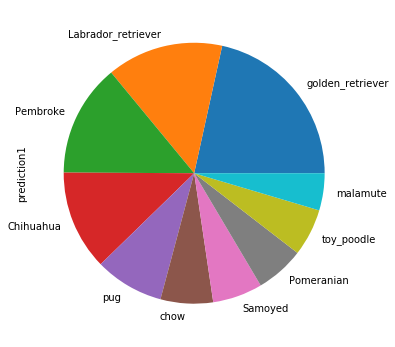

In [204]:
#Find most common dog's breeds
fig = plt.figure(figsize=(10,6))
df.prediction1.value_counts()[:10].plot(kind='pie')

In [193]:
#Let's find how many dog's breeds are easy to predict
df.query('prediction1_dog==True & prediction2_dog==True & prediction3_dog==True').prediction1.nunique()

110

In [194]:
#Let's find how many dog's breeds are difficut to predict
df.query('prediction1_dog==True & prediction2_dog==False & prediction3_dog==False').prediction1.nunique()

21

In [195]:
df_2=df.query('dog_stage in ["doggo","floofer","puppo", "pupper"]')

In [196]:
df_2.dog_stage.value_counts()

pupper     144
doggo      47 
puppo      19 
floofer    7  
Name: dog_stage, dtype: int64

Text(0.5, 1.0, "Top 15 dog's breeds with the highest average rating")

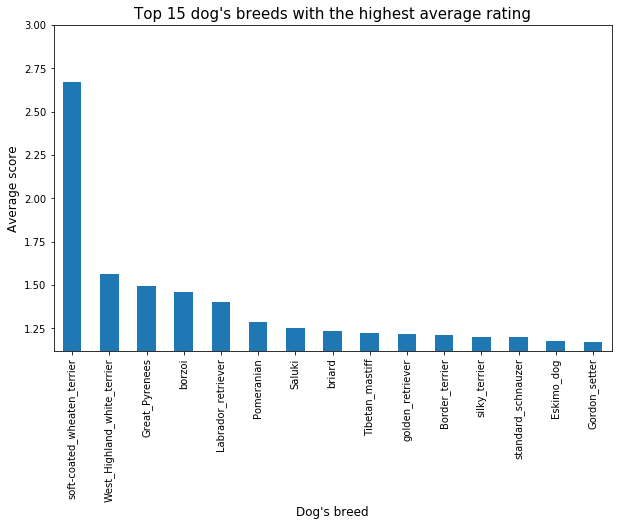

In [197]:
#Let's find top 15 dogs breeds based on average rating.

# Let's plot the top scores for the top 30 breeds on a standard bar chart
fig = plt.figure(figsize=(10,6))
df.groupby('prediction1').dog_rating.mean().sort_values(ascending=False)[:15].plot(kind='bar')
plt.ylim(1.12,3.);
plt.xlabel("Dog's breed", fontsize=12)
plt.ylabel("Average score", fontsize=12)
plt.title("Top 15 dog's breeds with the highest average rating", fontsize=15)

Text(0.5, 1.0, "Top 15 dog's breeds with the highest favourite count")

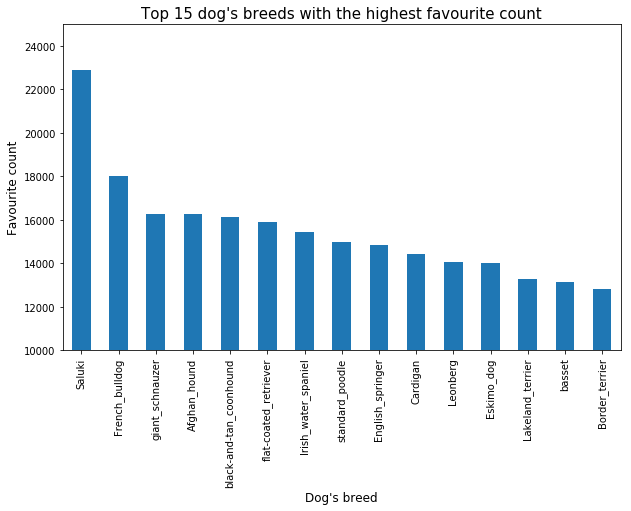

In [198]:
fig = plt.figure(figsize=(10,6))
df.groupby('prediction1').favorite_count.mean().sort_values(ascending=False)[:15].plot(kind='bar')
plt.ylim(10000,25000);
plt.xlabel("Dog's breed", fontsize=12)
plt.ylabel("Favourite count", fontsize=12)
plt.title("Top 15 dog's breeds with the highest favourite count", fontsize=15)

Text(0.5, 1.0, "Top 15 dog's breeds with the highest retweet count")

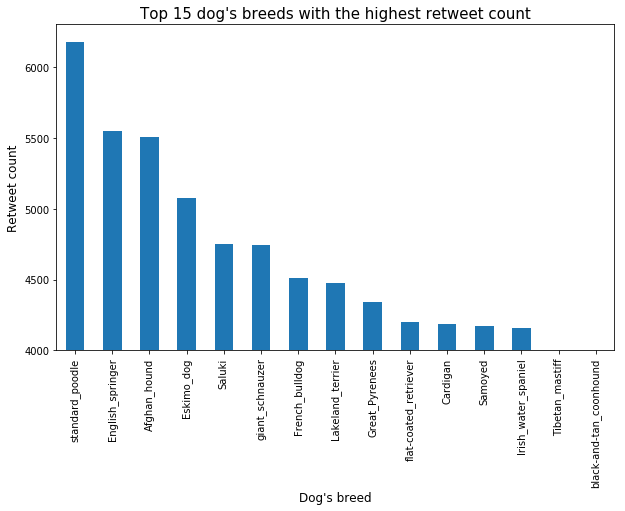

In [199]:
fig = plt.figure(figsize=(10,6))
df.groupby('prediction1').retweet_count.mean().sort_values(ascending=False)[:15].plot(kind='bar')
plt.ylim(4000,6300);
plt.xlabel("Dog's breed", fontsize=12)
plt.ylabel("Retweet count", fontsize=12)
plt.title("Top 15 dog's breeds with the highest retweet count", fontsize=15)

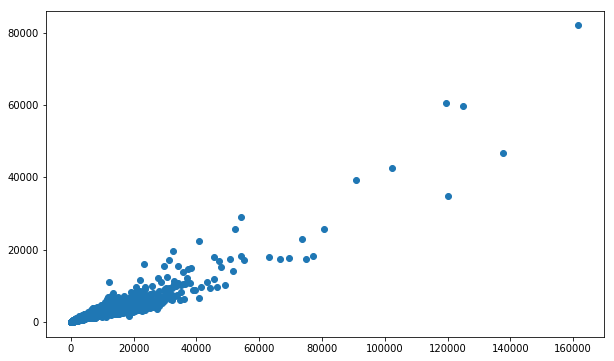

In [200]:
fig = plt.figure(figsize=(10,6))
pyplot.scatter(df.favorite_count, df.retweet_count)

In [201]:
# Let's compute correlation coefficient
df['favorite_count'].corr(df['retweet_count'])

0.9283484062817133

In [202]:
#Let's find the average favorite and retweet count for each dog stage
df_2=df[df.dog_stage.isin(['doggo','puppo','pupper','floofer'])]
df_2.dog_stage.value_counts()

pupper     144
doggo      47 
puppo      19 
floofer    7  
Name: dog_stage, dtype: int64

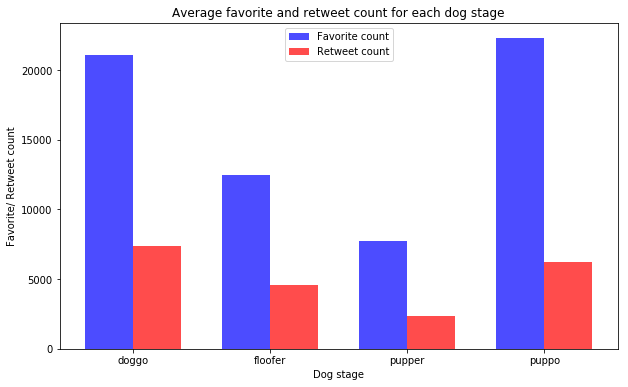

In [203]:
# grouped bar plot
fig = plt.figure(figsize=(10,6))
stage=['doggo','floofer','pupper','puppo']
ind = np.arange(len(stage))  # the x locations for the groups
width = 0.35   

plt.bar(ind, df_2.groupby('dog_stage').favorite_count.mean(), width, color='b', alpha=.7, label='Favorite count')
plt.bar(ind + width, df_2.groupby('dog_stage').retweet_count.mean(), width, color='r', alpha=.7, label='Retweet count')

# title and labels
plt.ylabel('Favorite/ Retweet count')
plt.xlabel('Dog stage')
plt.title('Average favorite and retweet count for each dog stage')
locations = ind + width / 2  # xtick locations
labels = ['doggo', 'floofer', 'pupper', 'puppo']  # xtick labels
plt.xticks(locations, labels)
plt.legend()

# Conclusion

* Golden retvier is the most common dog's breed, following by Labrador retriever, pembroke and chihuahua.
* Soft-coated wheaten terrier has the highest average rating, followed by West-Highland white terrier.
* Saluki again has the highest favorite count, followed by French bulldog.
* Standard poodle has the highest retweet count.
* Favorite and retweet count have a strong positive relationship.
* Overall, the favorite count is higher that retweet count for all dog stages. It can be also observed that doggo and puppo have the highest favorite and retweet counts, while pupper have the lowest both favorite and retweet counts. 